In [ ]:
import pandas as pd
import numpy as np

import ADPLearn as adp

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

plt.rcParams['figure.figsize'] = (7, 15)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline

# 1. 데이터 전처리

## 1) 결측치 처리

## 2) 이상치 처리

# 2. 데이터 변환

## 1) 탐색 & 상관분석

### (1) 상관 관계 분석

1) 데이터 로드

In [4]:
import ADPLearn as adp

airquality, _ = adp.load_data('airquality')
baseball, _ = adp.load_data('baseball')
cars93, _ = adp.load_data('cars93')
fifa, _ = adp.load_data('fifa')
iris, _ = adp.load_data('iris')
mtcars, _ = adp.load_data('mtcars')
swiss , _ = adp.load_data('swiss')
titanic, _ = adp.load_data('titanic')
usarrests, _ = adp.load_data('usarrests')
department, _ = adp.load_data('department')

In [8]:
airquality.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,5,1
1,2,36.0,118.0,8.0,72,5,2
2,3,12.0,149.0,12.6,74,5,3
3,4,18.0,313.0,11.5,62,5,4
4,5,NaN,NaN,14.3,56,5,5


In [386]:
department.iloc[:, 1:-1]

,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1
3,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16
4,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85
...,...,...,...,...,...,...,...,...,...
3495,3175200,3042900,NaN,골프,본 점,1,2.000000,1.000000,0
3496,29628600,7200000,6049600.0,시티웨어,부산본점,8,1.625000,0.461538,40
3497,75000,75000,NaN,주방용품,창원점,1,1.000000,0.000000,0
3498,1875000,1000000,NaN,화장품,본 점,2,1.000000,0.000000,39


In [381]:
department.gender = department.gender.astype(object)

In [416]:
def eda_chart(df, kind, **krargs):
    """_summary_
        kind
    Args:
        df (_type_): _description_
        kind (str): None
            - corr, pair
            - c1_n1_box, c1_n1_strip, c1_n1_violin
            - c1_n1_h1_violin
    """
    c, n, hue = None, None, None
    for k, v in krargs.items():
        if k=='c':
            c = krargs['c']
        elif k=='n':
            n = krargs['n']
        elif k=='hue':
            hue = krargs['hue']
    
    ## 상관관계 그래프
    if kind == 'corr':
        sns.heatmap(df.corr(), annot=True, vmax = 1,vmin = -1, 
                    cmap='coolwarm', linewidths=.5, fmt='.2f').set_title('Correlation')
    elif kind == 'na_heat':
        sns.heatmap(df[df.columns[df.dtypes != 'object']].T, 
                    cmap='Greens', linewidths=.5,).set_title('num_range')
    elif kind == 'pair':
        g = sns.pairplot(df, hue=hue, corner=True)
        g.fig.subplots_adjust(top=0.95)
        g.fig.suptitle('Pair')
    elif kind == 'c1_n1_box':
        g =sns.catplot(x=n, y=c, data=df, kind='box')
        g.fig.subplots_adjust(top=0.95)
        g.fig.suptitle(c)
    elif kind == 'c1_n1_strip':
        g =sns.catplot(x=n, y=c, data=df, kind='strip', alpha=.7, s=3)
        g.fig.subplots_adjust(top=0.95)
        g.fig.suptitle(c)
    elif kind == 'c1_n1_violin':
        g =sns.catplot(x=n, y=c, data=df, kind='violin', palette="coolwarm")
        g.fig.subplots_adjust(top=0.95)
        g.fig.suptitle(c)
    elif kind == 'c1_n1_h1_violin':
        g =sns.catplot(x=c, y=n, data=df, hue=hue, kind='violin', alpha=.7, split=True)
        g.fig.subplots_adjust(top=0.95)
        g.fig.suptitle(c)
    plt.show()

2. 상관 분석

<AxesSubplot:>

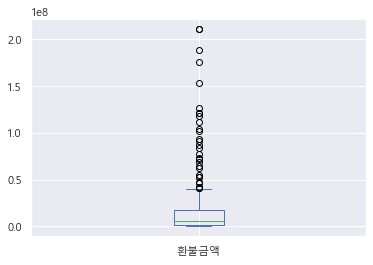

In [434]:
department.loc[department.gender==1, '환불금액'].plot.box()

<AxesSubplot:>

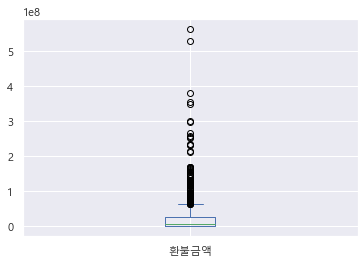

In [435]:
department.loc[department.gender==0, '환불금액'].plot.box()

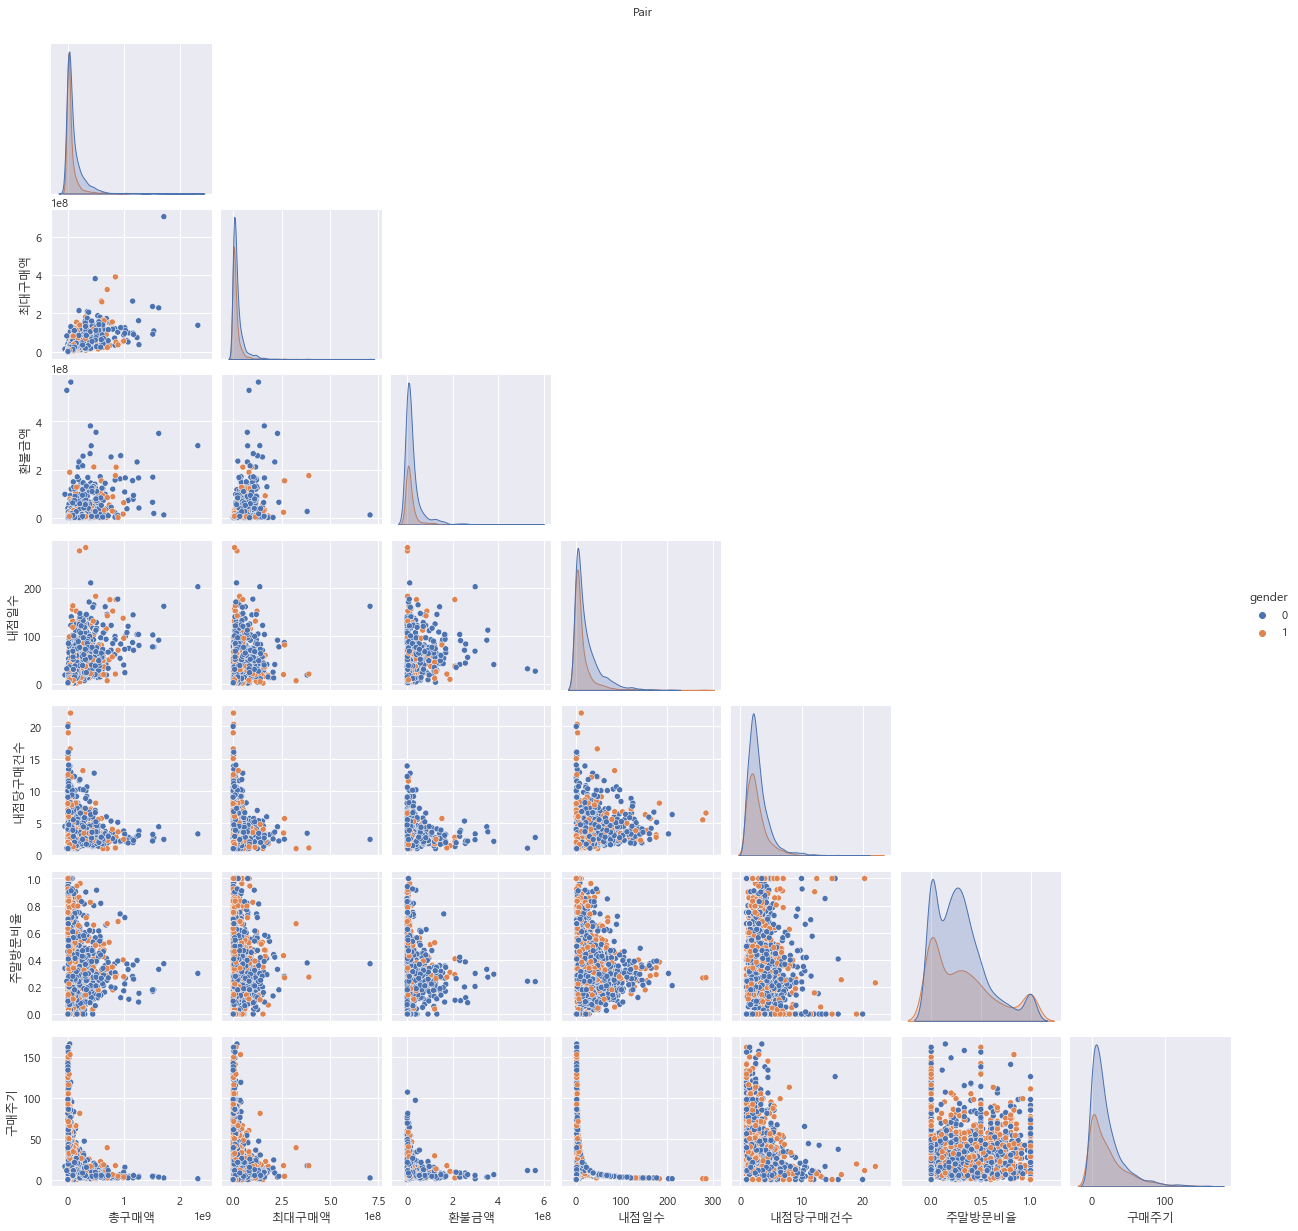

In [414]:
eda_chart(department.iloc[:, 1:], 'pair', hue='gender')

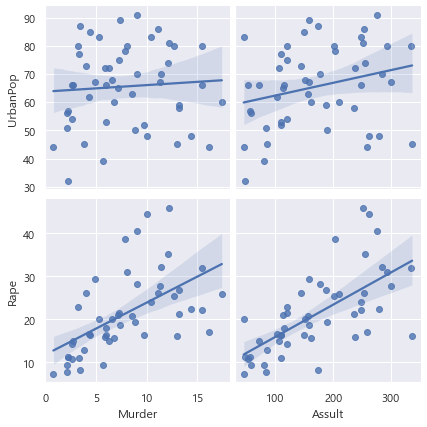

In [366]:
sns.pairplot(usarrests,x_vars=['Murder','Assult'],
             y_vars=['UrbanPop','Rape'], kind='reg', height=3)

# sns.pairplot(usarrests,x_vars=['인구수','CCTV'],
#              y_vars=['살인검거율','폭력검거율'],kind='reg',height=3)

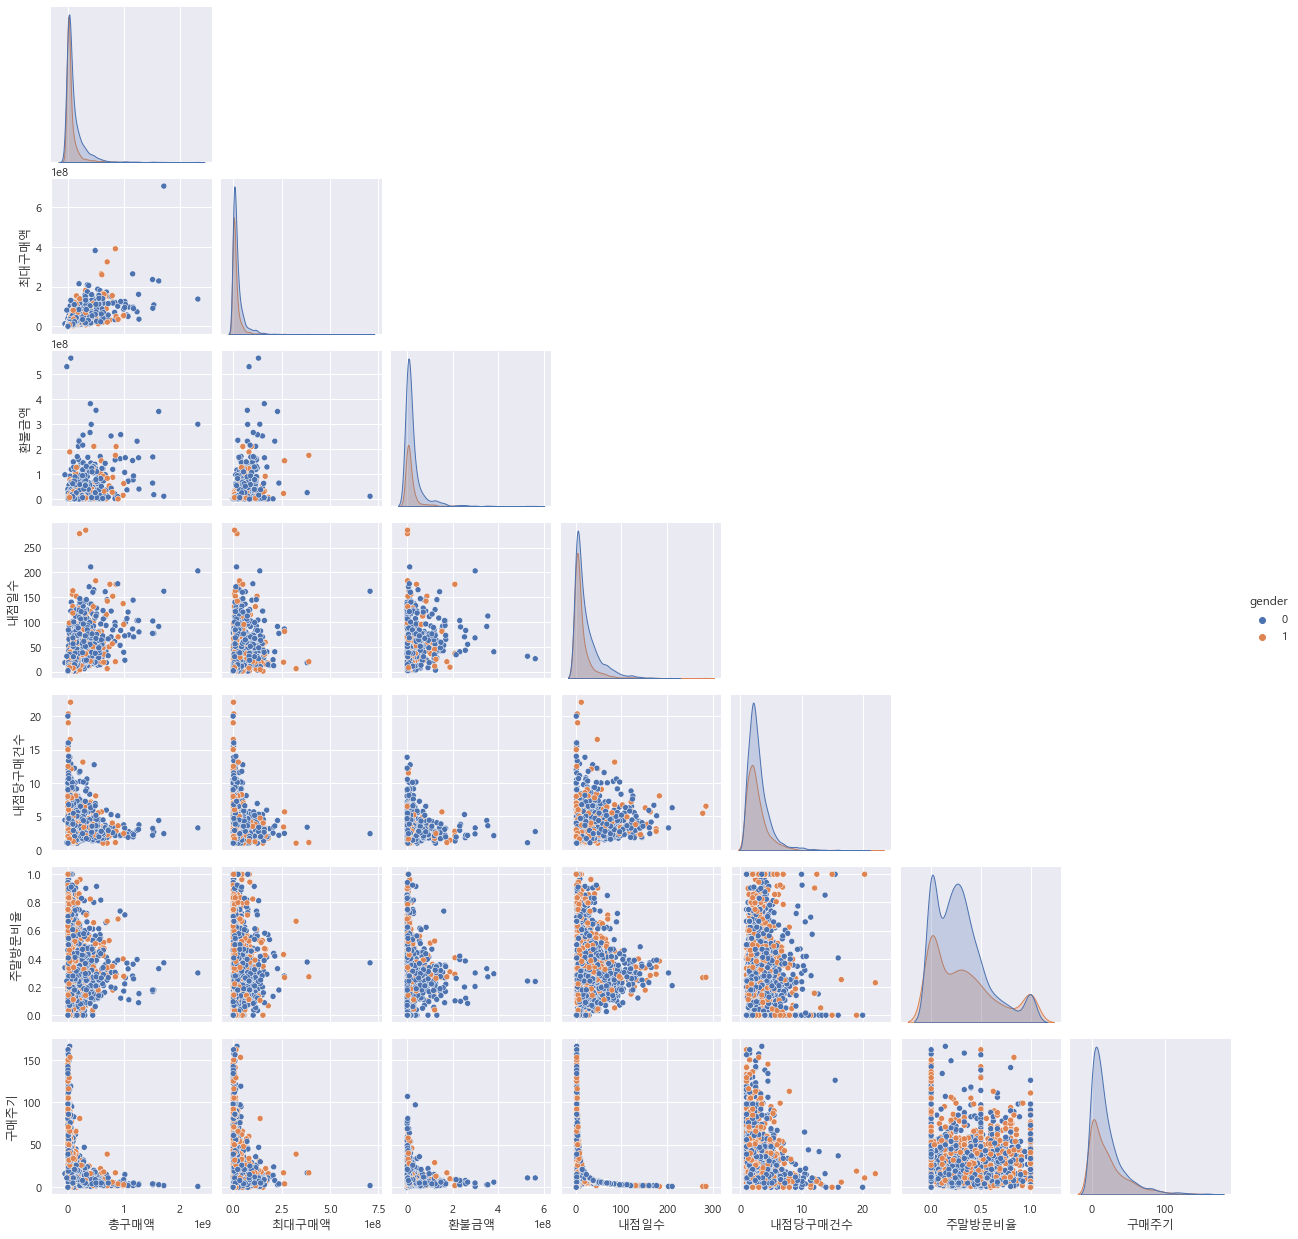

In [396]:
sns.pairplot(department.iloc[:, 1:], 
             hue='gender',
             corner=True
            #  kind='reg', 
            #  diag_kind = "hist",
            #  diag_kws = {'alpha':0.55, 'bins':10}
             )

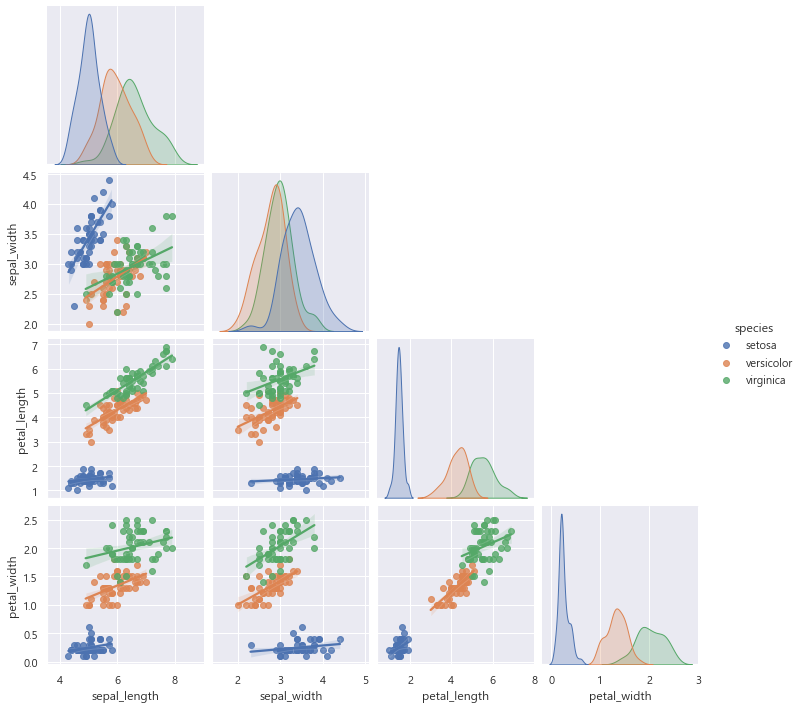

In [393]:
sns.pairplot(iris, 
            #  diag_kind = "hist", 
             kind='reg', 
             hue='species',
             corner=True,
            #  diag_kws = {'alpha':0.55, 'bins':10}
             )

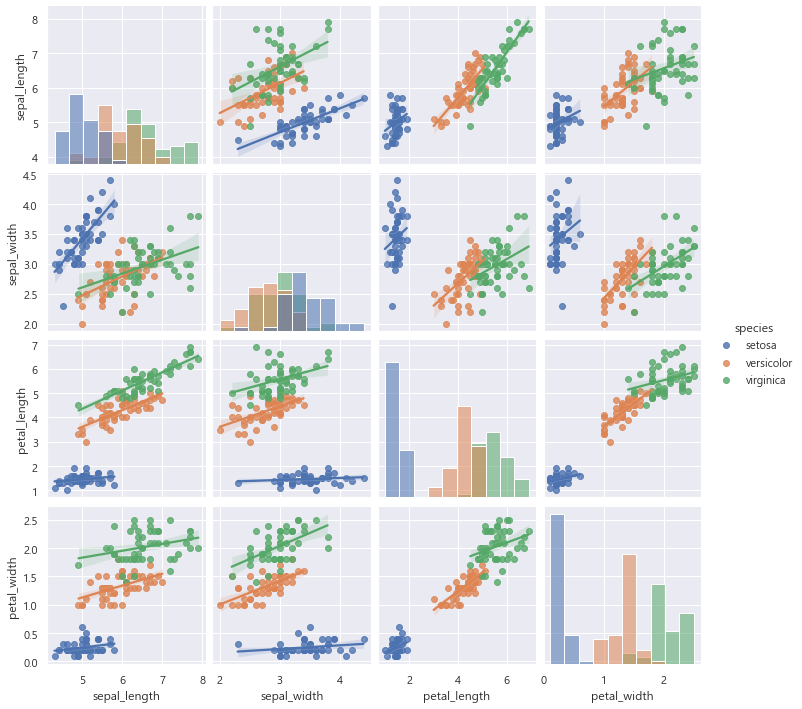

In [ ]:
sns.pairplot(iris, diag_kind = "hist", kind='reg', hue='species',
             diag_kws = {'alpha':0.55, 'bins':10})

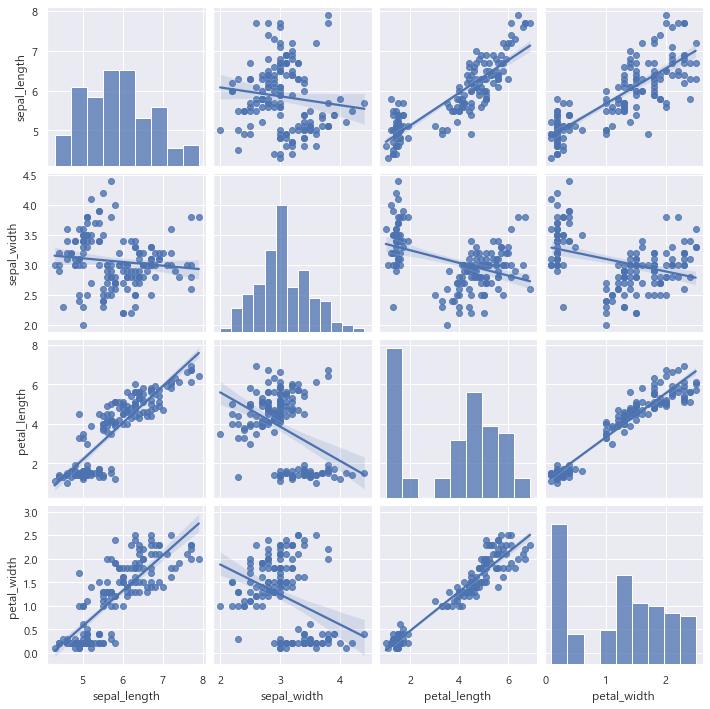

In [377]:
sns.pairplot(iris, kind='reg')

In [ ]:
# Correlation Graph
def corr_plot(df, options='pairplot'):

    if options == 'pairplot':
        sns.pairplot(df)
        plt.show()
    elif options == 'heatmap':
        sns.heatmap(df.corr(), cmap="RdYlBu_r", annot=True
                    vmin = -1, vmax = 1,)
        plt.show()
    else:
        print('Check Options')        

In [ ]:
sns.jointplot("total_bill", "tip", height=8, data=tips, kind="reg")
plt.show()

In [ ]:
plt.scatter(tips.total_bill, tips.tip)
plt.show()

In [ ]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', col='day', 
           col_wrap=2, height=6, data=tips)
plt.show()

In [ ]:
sns.lmplot(x="total_bill", y="tip", height=8, data=tips)
plt.show()

In [ ]:
corr_plot(usarrests, 'pairplot')

In [ ]:
tips=sns.load_dataset('tips')
tips

In [ ]:
1) 정규성 검정
Kolmogorov-Smirnov와 shapiro-Wilk test
Q-Q plot

만족하지 못하면 변수변환을 한다.

box-cox 또은 로그변환

In [ ]:
corr_plot(usarrests, 'heatmap')

## 2) 표준화와 정규화

## 3). 변수축소 - 주성분 & 요인분석

| 주성분분석 | 요인분석 |
| --- | --- |
| 관찰기술(요인분석 유형) | 모델링 기술 |
| 최대 분산양 설명 | 데이터의 공분산을 설명 |
| 관측된 변수의 선형 조합 | 미관측 변수/요인 선형조합 |
| 구성요소 해석 불가 | 레이블링 및 해석 가능 |
| 차원 축소법 | 잠재변수 방법 |

### (1) 주성분분석

1. ADPLearn 모듈과 데이터를 로드

In [ ]:
swiss, _ = adp.loaddata('swiss')
swiss.head(3)

2. 데이터 표준정규화

In [ ]:
# 표준 정규화
scaled_df = adp.scaler(swiss, 'standard')
scaled_df.head(3)

3. 주성분분석 실행

In [ ]:
ncom, cev, loadings, pca_df = adp.pca(scaled_df, 0.85)

4. 주성분분석 결과 확인

In [ ]:
print('최적 요인 수: {}\n누적 성분 분산량: {:.3f}'.format(ncom, cev))

In [ ]:
loadings

In [ ]:
pca_df.head(5)

### (2) 요인분석

1. ADPLearn 모듈과 데이터를 로드

In [ ]:
swiss, _ = adp.loaddata('swiss')
swiss.head(3)

2. 데이터 표준정규화

In [ ]:
# 표준 정규화
scaled_df = adp.scaler(swiss, 'standard')
scaled_df.head(3)

3. 요인분석 적정성 검사
    - bartlett: 상관행렬이 항등행렬(변수간 관련이 없음)이라는 귀무가설 검정
    - kmo : 변수간 편상관(인자가 서로를 설명) 강도 조사, 1에 가까울 수록 유리

In [ ]:
test = ['bartlett', 'kmo']

for t in test:
    t_r, tr_pass = adp.test_fa(scaled_df, t)
    print('{} test: {}\n{}'.format(t, 'Pass' if tr_pass else 'Fail', t_r))

4. 요인분석 실행

In [ ]:
ncom, cev, loadings, fa_df = adp.factor_analysis(scaled_df, 0.85)

4. 요인분석 결과 확인
    - Cumulative Eigen Value : 전체 변수에 대한 설명력

In [ ]:
print('최적 요인 수: {}\n누적 아이젠 값: {:.3f}'.format(ncom, cev))

In [ ]:
loadings

In [ ]:
fa_df.head(5)

5. 요인분석 결과 검증
    - 크론바흐 알파: 주어진 변수들이 한개 그룹에 속할 수 있는지 내적일관성 측정, 0.7 이상이면 우수

In [ ]:
t_r = adp.cronbach_alpha(scaled_df, loadings, 0.3)